### Installing and loading packages

In [1]:
import numpy as np
from pathlib import Path
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.feature_selection import SequentialFeatureSelector
%matplotlib inline

### Reading and compiling all the files

In [2]:
# Reading files drom the data folder
files = ['data/2016.csv','data/2017.csv','data/2018.csv','data/2019.csv']
df_2015 =pd.read_csv('data/2015.csv')
df_2015['Year'] = 2015
df_2016 =pd.read_csv('data/2016.csv')
df_2016['Year'] = 2016
df_2017 =pd.read_csv('data/2017.csv')
df_2017['Year'] = 2017
df_2018 =pd.read_csv('data/2018.csv')
df_2018['Year'] = 2018
df_2019 =pd.read_csv('data/2019.csv')
df_2019['Year'] = 2019

#combining files into dataframe
who = pd.concat([df_2015,df_2016,df_2017,df_2018,df_2019])
who.shape
#print(who[['Year','Country','Country or region']].groupby('Year').Country.unique())
who.isnull().sum()

Country                          312
Region                           467
Happiness Rank                   467
Happiness Score                  467
Standard Error                   624
Economy (GDP per Capita)         467
Family                           312
Health (Life Expectancy)         467
Freedom                          312
Trust (Government Corruption)    467
Generosity                         0
Dystopia Residual                467
Year                               0
Lower Confidence Interval        625
Upper Confidence Interval        625
Happiness.Rank                   627
Happiness.Score                  627
Whisker.high                     627
Whisker.low                      627
Economy..GDP.per.Capita.         627
Health..Life.Expectancy.         627
Trust..Government.Corruption.    627
Dystopia.Residual                627
Overall rank                     470
Country or region                470
Score                            470
GDP per capita                   470
S

In [3]:
# Cleaning and aligning columns from all the datasets
who['Country']= who['Country'].replace('', pd.NA).fillna(who['Country or region'])
who['Happiness Rank']= who['Happiness Rank'].replace('', pd.NA).fillna(who['Overall rank'])
who['Happiness Score']= who['Happiness Score'].replace('', pd.NA).fillna(who['Score'])
who['Happiness Rank']= who['Happiness Rank'].replace('', pd.NA).fillna(who['Happiness.Rank'])
who['Happiness Score']= who['Happiness Score'].replace('', pd.NA).fillna(who['Happiness.Score'])
who['GDP']= who['Economy (GDP per Capita)'].replace('', pd.NA).fillna(who['GDP per capita'])
who['LE']= who['Health (Life Expectancy)'].replace('', pd.NA).fillna(who['Healthy life expectancy'])
who['GDP']= who['GDP'].replace('', pd.NA).fillna(who['Economy..GDP.per.Capita.'])
who['LE']= who['LE'].replace('', pd.NA).fillna(who['Health..Life.Expectancy.'])
who['Trust']= who['Trust (Government Corruption)'].replace('', pd.NA).fillna(who['Perceptions of corruption'])
who['Trust']= who['Trust'].replace('', pd.NA).fillna(who['Trust..Government.Corruption.'])
who['Trust']= who['Trust'].replace('', pd.NA).fillna(0)
who['Freedom']= who['Freedom'].replace('', pd.NA).fillna(who['Freedom to make life choices'])
who['Dystopia Residual']= who['Dystopia Residual'].replace('', pd.NA).fillna(who['Dystopia.Residual'])
who['Family']= who['Family'].replace('', pd.NA).fillna(who['Social support'])
print(who.isnull().sum())
#who.columns
who_clean = who[['Country', 'Happiness Rank', 'Happiness Score', 'Family','Freedom','Generosity','GDP', 'LE', 'Trust','Year']]
who_clean.to_csv('data/WH_2015_2019.csv')

Country                            0
Region                           467
Happiness Rank                     0
Happiness Score                    0
Standard Error                   624
Economy (GDP per Capita)         467
Family                             0
Health (Life Expectancy)         467
Freedom                            0
Trust (Government Corruption)    467
Generosity                         0
Dystopia Residual                312
Year                               0
Lower Confidence Interval        625
Upper Confidence Interval        625
Happiness.Rank                   627
Happiness.Score                  627
Whisker.high                     627
Whisker.low                      627
Economy..GDP.per.Capita.         627
Health..Life.Expectancy.         627
Trust..Government.Corruption.    627
Dystopia.Residual                627
Overall rank                     470
Country or region                470
Score                            470
GDP per capita                   470
S

### Analysing variables using plots

Country            0
Happiness Rank     0
Happiness Score    0
Family             0
Freedom            0
Generosity         0
GDP                0
LE                 0
Trust              0
Year               0
dtype: int64


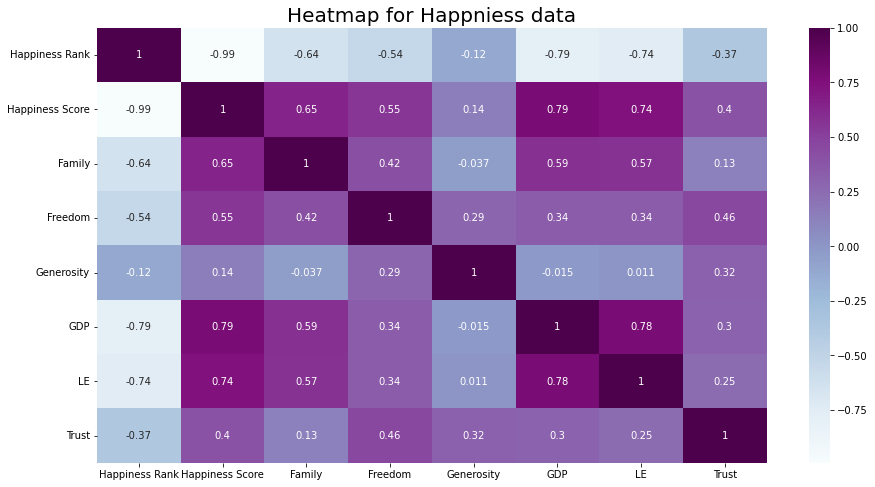

In [4]:
#Heat Map to plot the correlation
print(who_clean.isnull().sum())
plt.figure(figsize=(15,8))
sns.heatmap(who_clean.loc[:, who_clean.columns!='Year'].corr(), annot=True, cmap="BuPu")
plt.title("Heatmap for Happniess data", fontsize =20)
plt.show()

#### Interpretation
As expected, the Happniess Score and Happiness are strongly negatively correlated because the higher the happiness score the lower the numerical value of the rank. If we focus on Happiness score as a target we can see that it is strongly positively correlated to the GDP and Life expectancy in the country. Family/Social Support and Trust on the government also has some sort of a positive correlattoon. Generosity doesn't seem to be important. 

Among the features themselves, there is a strong positive correlation between GDP and life expectancy. This is not surprsising as a country that is doing well economically will have more resources to provide a better life for its citizens thus improving their access to better healthcare and support systems.

In [5]:
who_clean=who_clean.reset_index(drop=True)

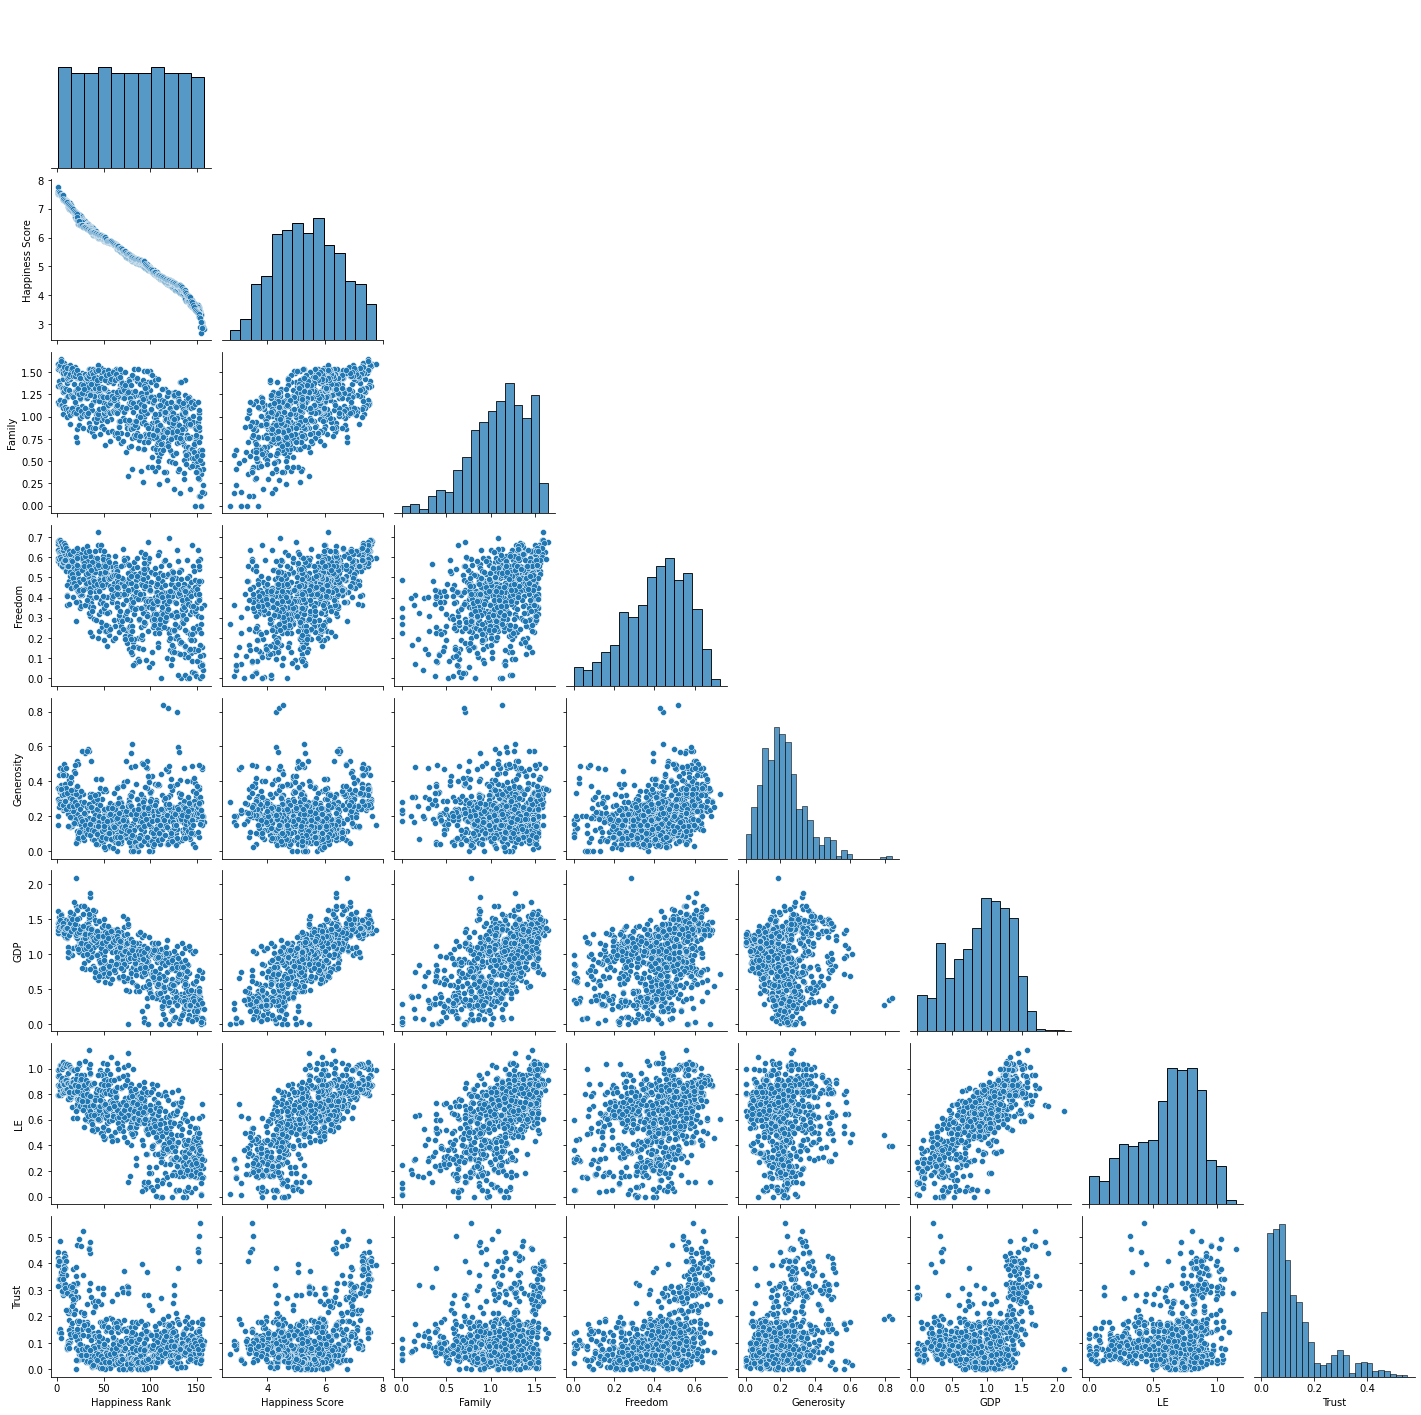

In [6]:
# Pair plot 
sns.pairplot(who_clean.loc[:, who_clean.columns!='Year'], corner=True)
plt.show()

#### Interpretation

I'm using a a pairplot to observe the scatterplot for the features withrespect to Happiness Score. 
* The linear relationship between the Happiness Score is more evident for things like GDP and Life Expectancy. 
* However Trust seems to have a parabolic kind od distribution for the scatter plot. Additionally pairplot is useful in observing the histogram for each feature.
* We see that the Generosity and Trust variables have a heavy right-skew on them which means that our data set doesn't have any records demonstrating high generosity and Trust scores. 
* The GDP and Life expectancy curves are notexactly uniform either but that should be expected from a real world dataset. other than that, all the correlations we observed in the heat map hold true here as well

### Feauture Engineering 

In [7]:
who_clean.columns

Index(['Country', 'Happiness Rank', 'Happiness Score', 'Family', 'Freedom',
       'Generosity', 'GDP', 'LE', 'Trust', 'Year'],
      dtype='object')

In [8]:
# Encoding Data
#who_enc = pd.DataFrame(LabelEncoder().fit_transform(who_clean['Country']),columns=['Country_E'])
#who_encoded=pd.concat([who_clean,who_enc],axis=1)#.drop(columns=['Country'])
#print(who_encoded)
who_encoded=who_clean.copy()
# Not entirely certain whether I should be encoding the country of not, Decided not to do it towards the end

In [9]:
#Defining Training Dataset for 2015-2018
X_train = who_encoded[who_encoded['Year'] !=2019][who_encoded.columns.difference(['Happiness Score','Happiness Rank','Year'])]
y_train = who_encoded[who_encoded['Year'] !=2019]['Happiness Score']

#Defining Test Datset for 2019
X_test = who_encoded[who_encoded['Year'] ==2019][who_encoded.columns.difference(['Happiness Score','Happiness Rank','Year'])]
y_test = who_encoded[who_encoded['Year'] ==2019]['Happiness Score']

X_test.head()


,Country,Family,Freedom,GDP,Generosity,LE,Trust
626,Finland,1.587,0.596,1.340,0.153,0.986,0.393
627,Denmark,1.573,0.592,1.383,0.252,0.996,0.410
628,Norway,1.582,0.603,1.488,0.271,1.028,0.341
629,Iceland,1.624,0.591,1.380,0.354,1.026,0.118
630,Netherlands,1.522,0.557,1.396,0.322,0.999,0.298


In [10]:
#print(y_test)
#print(X_test)
#Printed it just to check if the indexes were same

#### Scaling the data for applying models

In [11]:
#Selecting the Standard Scaler to standardize the values of the features before we use them in the model. 
#This should improve the performace of the model

#Initializing Scaler
scaler = StandardScaler(with_mean=True)

#Leaving out country because it is categorical
S_X_train = scaler.fit_transform(X_train[X_train.columns.difference(['Country'])])
S_X_test = scaler.fit_transform(X_test[X_test.columns.difference(['Country'])])


### Model Selection and Validation

#### Linear Regression


In [12]:
#Iniitalize Model
lm = LinearRegression()

#Feature Selection : choose the best new feature in each iteration and add it to the model 
#Using Cross validation to determine most relevant features for the model
sfs = SequentialFeatureSelector(lm,  
                                direction = 'forward',
                                scoring = 'neg_mean_squared_error',
                                cv = 10) 
sfs = sfs.fit(S_X_train, y_train)
feature_names = np.array(who_encoded.columns.difference(['Happiness Score','Happiness Rank','Year','Country']))
print("Features selected by SFS: "+str(feature_names[sfs.get_support()]))

Features selected by SFS: ['Freedom' 'GDP' 'LE']


In [13]:
# Training with Significant Features
selected = feature_names[sfs.get_support()].tolist()

# New Feature set
X_train_selected = sfs.transform(S_X_train)
X_test_selected = sfs.transform(S_X_test)

#Refitting model
lm2 = LinearRegression().fit(X_train_selected, y_train)


In [14]:
# Performance Metrics 
print(" Training R-squared: ",lm2.score(X_train_selected, y_train))
print("Test R-squared: ", lm2.score(X_test_selected, y_test))

train_pred = lm2.predict(X_train_selected) #Calculating y-pred for training
test_pred = lm2.predict(X_test_selected) # Calculating y-pred for test

print('Training Mean squared error: %.2f'% mean_squared_error(y_train, train_pred))
print('Testing Mean squared error: %.2f'% mean_squared_error(y_test, test_pred))

 Training R-squared:  0.7397606585245962
Test R-squared:  0.7395356130451745
Training Mean squared error: 0.33
Testing Mean squared error: 0.32


##### Review of the model

The model is decent with a R-Squared at (0.74) for the test dataset. 

#### Polynomial Regression

In [15]:

for i in range(2,6):
    #Define Degree of polynomial and transform features
    poly_model = PolynomialFeatures(degree=i)
    X_poly_train = poly_model.fit_transform(X_train_selected)
    X_poly_test = poly_model.fit_transform(X_test_selected)
    
    #Define and Fit Model
    lm_poly = LinearRegression()
    lm_poly.fit(X_poly_train, y_train)
    
    # Performance Metrics 
    y_pred_poly = lm_poly.predict(X_poly_test)
    print('For degree: ',i,'\nR-Squared for train: %.2f' %  lm_poly.score(X_poly_train, y_train))
    print('R-Squared for test:%.2f' %  lm_poly.score(X_poly_test, y_test))
    print('Mean squared error : %.2f' % mean_squared_error(y_test, y_pred_poly))
    
    
   

For degree:  2 
R-Squared for train: 0.75
R-Squared for test:0.76
Mean squared error : 0.30
For degree:  3 
R-Squared for train: 0.78
R-Squared for test:0.77
Mean squared error : 0.28
For degree:  4 
R-Squared for train: 0.80
R-Squared for test:0.69
Mean squared error : 0.38
For degree:  5 
R-Squared for train: 0.81
R-Squared for test:0.59
Mean squared error : 0.51


##### Review of the model

* The third degree model gives a lower MSE and higher R-Squred than simple linear regression. We observe that as the degrees increase, the accuracy of the model keeps going down for y-test. 
* The model starts to overfit at 4the degree because Y-pred for training set is much higher than that of the test set.

#### Ridge Model

In [16]:
#Implementing Regular Ridge Model for a regularized model that adjusts for overfitting
r = Ridge()
r.fit(S_X_train,y_train) #Fit Model

train_pred_r = r.predict(S_X_train) #Calculating y-pred for training
test_pred_r = r.predict(S_X_test) # Calculating y-pred for test

#Performance Metrics : Model Validation

# Calculating Mean Squared Error
print('Training Mean squared error: %.2f'% mean_squared_error(y_train, train_pred_r))
print('Testing Mean squared error: %.2f'% mean_squared_error(y_test, test_pred_r))

#Calculating R-Squred 
print('Training R-Squared: ', r.score(S_X_train, y_train))
print('Testing R-Squared: ', r.score(S_X_test, y_test))


Training Mean squared error: 0.30
Testing Mean squared error: 0.28
Training R-Squared:  0.7647844450417416
Testing R-Squared:  0.7693073969755457


In [17]:
#### Tuning the ridge model to improve performance by adjusting flexibility of the model (alpha)
alphas = np.logspace(-10, 10, 100)
e_train =[]
e_test = []

for a in alphas:
    r.set_params(alpha=a)
    r.fit(S_X_train, y_train)
    CV_error = np.mean(cross_val_score(r, S_X_train, y_train, cv=10, scoring='neg_mean_squared_error'))
    e_train.append(np.abs(CV_error))
    e_test.append(mean_squared_error(y_test, r.predict(S_X_test)))

In [18]:
#Figuring out the best alpha that gives minimum CV error
min_err_ind = (np.where(e_train == np.min(e_train))[0])
print("Best alpha: ", alphas[min_err_ind])

Best alpha:  [8.11130831]


In [19]:
# Refitting Ridge after updating alpha
r2 = Ridge(alpha=8.11130831)
r2.fit(S_X_train, y_train)

train_pred_r2 = r2.predict(S_X_train) #Calculating y-pred for training
test_pred_r2 = r2.predict(S_X_test) # Calculating y-pred for test

print('Training Mean squared error: %.2f'% mean_squared_error(y_train, train_pred_r2))
print('Testing Mean squared error: %.2f'% mean_squared_error(y_test, test_pred_r2))

print('Training R-Squared:  %.2f'% r2.score(S_X_train, y_train))
print('Testing R-Squared:  %.2f'% r2.score(S_X_test, y_test))

Training Mean squared error: 0.30
Testing Mean squared error: 0.28
Training R-Squared:  0.76
Testing R-Squared:  0.77


#### Cross-Validation

In [20]:
#Initializing a ridgeCV model to double check

r_CV = RidgeCV(cv=10).fit(S_X_train, y_train)
coefficients=pd.DataFrame(feature_names,columns=['feature'])
coefficients["values"] = r_CV.coef_

print("Ridge - best_score: \n",r_CV.best_score_)
print("Ridge - best alpha: "+str(r_CV.alpha_))
print("Ridge - intercept: "+str(r_CV.intercept_))
print("Ridge - coefficients:\n ", coefficients)

Ridge - best_score: 
 -0.26309671092772313
Ridge - best alpha: 10.0
Ridge - intercept: 5.372020767004726
Ridge - coefficients:
        feature    values
0      Family  0.211137
1     Freedom  0.215944
2         GDP  0.441762
3  Generosity  0.067664
4          LE  0.278888
5       Trust  0.094122


In [21]:
# Re-training after CV results 
r3 = Ridge(alpha=8.11130831)
r3.fit(S_X_train, y_train)

train_pred_r3 = r3.predict(S_X_train) #Calculating y-pred for training
test_pred_r3 = r2.predict(S_X_test) # Calculating y-pred for test

print('Training Mean squared error: %.2f'% mean_squared_error(y_train, train_pred_r3))
print('Testing Mean squared error: %.2f'% mean_squared_error(y_test, test_pred_r3))

print('Training R-Squared:  %.2f'% r3.score(S_X_train, y_train))
print('Testing R-Squared:  %.2f'% r3.score(S_X_test, y_test))

#No major difference in the R-Sqaured but I am picking the Ridge model to proceed.

Training Mean squared error: 0.30
Testing Mean squared error: 0.28
Training R-Squared:  0.76
Testing R-Squared:  0.77


### Questions to Answer

* What are your predicted scores for the top 5 most happy countries?
* What are your predicted scores for the bottom 5 less happy countries?
* Pick two features to compare the top and bottom 5 countries. How are these features different in the bottom and top countries?
* How good are the happiness score predictions with your final model?

In [22]:
### Final Prediction using Ridge Model
y_2019_pred = pd.DataFrame(test_pred_r3,columns=['Predicted Score'])
print(y_2019_pred.shape)
print(X_test.shape)
X_test=X_test.reset_index(drop=True)
X_test_pred=pd.concat([X_test,y_2019_pred],axis=1)
X_test_pred=X_test_pred.sort_values(by='Predicted Score', ascending=False)
X_test_pred

(156, 1)
(156, 7)


,Country,Family,Freedom,GDP,Generosity,LE,Trust,Predicted Score
33,Singapore,1.463,0.556,1.572,0.271,1.141,0.453,7.426027
2,Norway,1.582,0.603,1.488,0.271,1.028,0.341,7.245810
5,Switzerland,1.526,0.572,1.452,0.263,1.052,0.343,7.142963
1,Denmark,1.573,0.592,1.383,0.252,0.996,0.410,7.123633
13,Luxembourg,1.479,0.526,1.609,0.194,1.012,0.316,7.093141
...,...,...,...,...,...,...,...,...
131,Chad,0.766,0.174,0.350,0.198,0.192,0.078,3.469696
144,Burundi,0.447,0.220,0.046,0.176,0.380,0.180,3.276679
155,South Sudan,0.575,0.010,0.306,0.202,0.295,0.091,3.171556
153,Afghanistan,0.517,0.000,0.350,0.158,0.361,0.025,3.143524


In [23]:
#What are your predicted scores for the top 5 most happy countries?
X_test_pred.head()

,Country,Family,Freedom,GDP,Generosity,LE,Trust,Predicted Score
33,Singapore,1.463,0.556,1.572,0.271,1.141,0.453,7.426027
2,Norway,1.582,0.603,1.488,0.271,1.028,0.341,7.245810
5,Switzerland,1.526,0.572,1.452,0.263,1.052,0.343,7.142963
1,Denmark,1.573,0.592,1.383,0.252,0.996,0.410,7.123633
13,Luxembourg,1.479,0.526,1.609,0.194,1.012,0.316,7.093141


In [24]:
# What are your predicted scores for the bottom 5 less happy countries?
X_test_pred.tail()

,Country,Family,Freedom,GDP,Generosity,LE,Trust,Predicted Score
131,Chad,0.766,0.174,0.350,0.198,0.192,0.078,3.469696
144,Burundi,0.447,0.220,0.046,0.176,0.380,0.180,3.276679
155,South Sudan,0.575,0.010,0.306,0.202,0.295,0.091,3.171556
153,Afghanistan,0.517,0.000,0.350,0.158,0.361,0.025,3.143524
154,Central African Republic,0.000,0.225,0.026,0.235,0.105,0.035,2.526743


#### Two features to compare the top and bottom 5 countries.

Based on the co-efficients of the RidgeCV regression we know that GDP and Life Expectancy are important factors for calculating Happiness Score.
This is validated by the results since the poorest performing countries have really low GDP and LE comparitively. Social support for underperfroming countries is also low 

####  Model Performance

The mean squared error of the model is low (0.28) and the R-Squared in decently high which means most of the variance in the model can be explained. The performance could be better though so i need to take a better look at how I can get more features in. While making the final dataset I took a call to drop a lot of columns which could have been used as features in the dataset. If we had consistent data across the years I would've chosen to keep it.

### References 

#### Reading And Cleaning Files

EDA CheatSheet from Semester 1

#### Plots for Predictive

Lab2_S23_Solutions.html

#### Scaling 

Lab3_S23_Solutions.html

#### Encoding 

Lab 7 Code 

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html


#### Regression Models 

Lab3_S23_Solutions.html

#### Feature Selection 

Lab4_s23_Solutions.html

#### Tuning 

Lab3_S23_Solutions.html

#### Cross-Validation 

Lab3_S23_Solutions.html

#### Final Questions 

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html


